# 1. Annotations exploration

In [38]:
import json
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path


In [42]:
#load annotations to check what is in there
annotations_path = Path('/Users/rraushan/Downloads/secondroundtechnicalassessmentseniorengineermach/coin-dataset/_annotations.coco.json')
with open(annotations_path, 'r') as f:
    data = json.load(f)

#print to see what it looks like
print(json.dumps(data, indent=2))

{
  "info": {
    "year": "2023",
    "version": "1",
    "contributor": "",
    "date_created": "2023-02-10T14:06:10+00:00"
  },
  "categories": [
    {
      "id": 0,
      "name": "Coin-Dataset",
      "supercategory": "none"
    },
    {
      "id": 1,
      "name": "0",
      "supercategory": "Coin-Dataset"
    }
  ],
  "images": [
    {
      "id": 0,
      "license": 1,
      "file_name": "download--95-_jpg.rf.01518d3a04efa6c09f8e2adfb937983c.jpg",
      "height": 259,
      "width": 194,
      "date_captured": "2023-02-10T14:06:10+00:00"
    },
    {
      "id": 1,
      "license": 1,
      "file_name": "20190619_085307_jpg.rf.017b6a6dc75d86c67a8805b01c8d8b6e.jpg",
      "height": 236,
      "width": 512,
      "date_captured": "2023-02-10T14:06:10+00:00"
    },
    {
      "id": 2,
      "license": 1,
      "file_name": "19687092-68a2-495f-a349-4069409a5d29_jpg.rf.02f9c4ad91747ca769e068a522cf9519.jpg",
      "height": 480,
      "width": 640,
      "date_captured": "2023-02-10

> looks `COCO` style

In [40]:
# get more details about the annotations

import json

with open('/Users/rraushan/Downloads/secondroundtechnicalassessmentseniorengineermach/coin-dataset/_annotations.coco.json', 'r') as f:
    data = json.load(f)

# Analyze structure
print("=== COCO Annotation File Analysis ===\n")

# Categories
print(f"Categories: {len(data.get('categories', []))}")
for cat in data.get('categories', []):
    print(f"  - ID {cat['id']}: {cat['name']} (supercategory: {cat.get('supercategory', 'N/A')})")

# Images
images = data.get('images', [])
print(f"\nImages: {len(images)}")
if images:
    print(f"  Resolution range: {min(img['width'] for img in images)}x{min(img['height'] for img in images)} to {max(img['width'] for img in images)}x{max(img['height'] for img in images)}")

# Annotations
annotations = data.get('annotations', [])
print(f"\nAnnotations: {len(annotations)}")

# Check first few annotations for structure
print("\n=== Sample Annotation Structure ===")
if annotations:
    sample = annotations[0]
    print(f"Fields present: {list(sample.keys())}")
    print(f"\nSample annotation:")
    for key, value in sample.items():
        print(f"  {key}: {value}")
    
    # Check if segmentation exists
    has_segmentation = any('segmentation' in ann for ann in annotations)
    print(f"\nHas segmentation data: {has_segmentation}")
    
    # Check bbox format
    print(f"\nBbox format (first 5): ")
    for i, ann in enumerate(annotations[:5]):
        print(f"  Image {ann['image_id']}: bbox={ann.get('bbox', 'N/A')}")
    
    # Stats
    print(f"\n=== Dataset Statistics ===")
    print(f"Total annotations: {len(annotations)}")
    print(f"Annotations per image (avg): {len(annotations) / len(images):.2f}")
    
    # Count annotations per image
    from collections import Counter
    img_counts = Counter(ann['image_id'] for ann in annotations)
    print(f"Images with most annotations: {max(img_counts.values())}")
    print(f"Images with fewest annotations: {min(img_counts.values())}")
    print(f"Median annotations per image: {sorted(img_counts.values())[len(img_counts)//2]}")

=== COCO Annotation File Analysis ===

Categories: 2
  - ID 0: Coin-Dataset (supercategory: none)
  - ID 1: 0 (supercategory: Coin-Dataset)

Images: 191
  Resolution range: 194x194 to 2048x2048

Annotations: 521

=== Sample Annotation Structure ===
Fields present: ['id', 'image_id', 'category_id', 'bbox', 'area', 'segmentation', 'iscrowd']

Sample annotation:
  id: 0
  image_id: 0
  category_id: 1
  bbox: [67, 83, 72, 71]
  area: 5112
  segmentation: []
  iscrowd: 0

Has segmentation data: True

Bbox format (first 5): 
  Image 0: bbox=[67, 83, 72, 71]
  Image 1: bbox=[185, 75, 86, 86]
  Image 2: bbox=[85, 65, 365, 285]
  Image 3: bbox=[521, 201, 680, 687]
  Image 4: bbox=[199, 164, 50, 47]

=== Dataset Statistics ===
Total annotations: 521
Annotations per image (avg): 2.73
Images with most annotations: 14
Images with fewest annotations: 1
Median annotations per image: 2


Total number of images: 191


In [45]:
print(f"Total number of images: {len(data['images'])}")
print(f"Total number of Annotations: {len(data['annotations'])}")

Total number of images: 191
Total number of Annotations: 521


In [47]:
#check the first annotation to see what it looks like
print(json.dumps(data['annotations'][0], indent=2))

{
  "id": 0,
  "image_id": 0,
  "category_id": 1,
  "bbox": [
    67,
    83,
    72,
    71
  ],
  "area": 5112,
  "segmentation": [],
  "iscrowd": 0
}


In [48]:
#check if segmentation is empty for all annotations
empty_segmentation_count = sum(1 for ann in data['annotations'] if not ann['segmentation'])
print(f"Number of annotations with empty segmentation: {empty_segmentation_count}")

Number of annotations with empty segmentation: 521


In [49]:
# check if area is the bbox area for all annotations
bbox_area_mismatch_count = sum(1 for ann in data['annotations'] if ann['area'] != ann['bbox'][2] * ann['bbox'][3])
print(f"Number of annotations where area does not match bbox area: {bbox_area_mismatch_count}")

Number of annotations where area does not match bbox area: 0


> **Observations**: 
> - *All 521 annotations have empty segmentation: [] arrays => **Only object detection Ground truths present***
>
> - *Bounding boxes only: COCO format with bbox in [x, y, width, height]*
> - *Single semantic class: "Coin-Dataset" (though there's a redundant subcategory "0")*
> - *191 images, variable resolution (194×194 to 2048×2048)*
> - *No masks, polygons, or circle parameters*
> - *Multiple instances per image (avg 2.73, up to 14)*

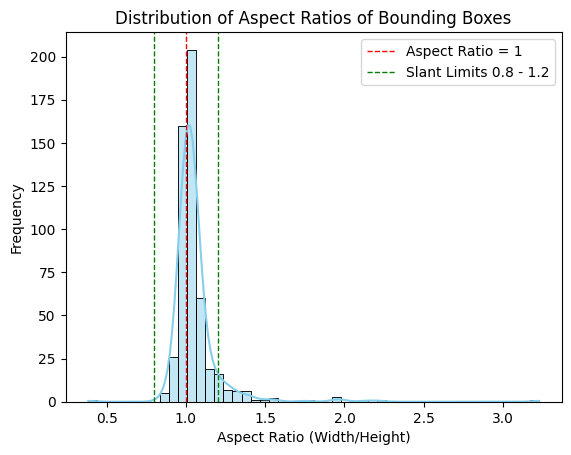

In [50]:
# we see the width and height of bbox are not same, so not exactly circular. Let's see how the aspect ratio of the bbox looks like
import seaborn as sns

aspect_ratios = [ann['bbox'][2] / ann['bbox'][3] for ann in data['annotations']]
sns.histplot(aspect_ratios, bins=50, color='skyblue', edgecolor='black', kde=True)
plt.title('Distribution of Aspect Ratios of Bounding Boxes')
plt.xlabel('Aspect Ratio (Width/Height)')
plt.ylabel('Frequency')
plt.axvline(1.0, color='red', linestyle='dashed', linewidth=1, label='Aspect Ratio = 1')
plt.axvline(0.8, color='green', linestyle='dashed', linewidth=1, label='Slant Limits 0.8 - 1.2')
plt.axvline(1.2, color='green', linestyle='dashed', linewidth=1)
plt.legend()
plt.show()

In [51]:
# Quantify the slant by calculating the percentage of annotations that have aspect ratios outside the range of 0.8 to 1.2
slant_annotations_count = sum(1 for ann in data['annotations'] if ann['bbox'][2] / ann['bbox'][3] < 0.8 or ann['bbox'][2] / ann['bbox'][3] > 1.2)
total_annotations = len(data['annotations'])
slant_percentage = (slant_annotations_count / total_annotations) * 100
print(f"Percentage of annotations with slant (aspect ratio outside 0.8 - 1.2): {slant_percentage:.2f}%")

Percentage of annotations with slant (aspect ratio outside 0.8 - 1.2): 7.87%


> *~8% of coins deviate significantly from a 1.1 aspect ratio.* 
>
> *So the initial thought of rigid circular mask would fail here. A better approach would be to use elliptical fit based on bbox*

---
# Overall Summary
## Dataset Statistics

| Metric | Value |
|--------|-------|
| Total images | 191 |
| Total annotations | 521 |
| Annotations per image | 2.73 (avg), 2 (median) |
| Max objects per image | 14 |
| Min objects per image | 1 |
| Resolution range | 194×194 to 2048×2048 px |

---

## Annotation Format

### COCO Structure
Standard COCO JSON with four top-level keys:
- `info` — Dataset metadata (version, creation date)
- `images` — Image metadata (id, filename, width, height)
- `annotations` — Object instances (bbox, category, area)
- `categories` — Class definitions

### Annotation Fields (per instance)
```json
{
  "id": 0,
  "image_id": 0,
  "category_id": 1,
  "bbox": [67, 83, 72, 71],  // [x, y, width, height]
  "area": 5112,
  "segmentation": [],         // ⚠️ Always empty
  "iscrowd": 0
}
```

### Categories
- **ID 0:** `Coin-Dataset` (parent category)
- **ID 1:** `0` (actual annotation class)

> **Note:** All annotations use `category_id: 1`. The dual-category structure appears to be a Roboflow export artifact.

---

## What This Dataset Provides

| Aspect | Format |
|--------|--------|
| **Object localization** | Axis-aligned bounding boxes |
| **Instance separation** | Multiple objects per image supported |
| **Image metadata** | Width, height, filename, ID |
| **COCO compatibility** | Standard schema, loadable by `pycocotools` |

---

# 2. Images exploration

In [52]:
# first check if we have all images in the directory for which we have annotations

images_dir = Path('/Users/rraushan/Downloads/secondroundtechnicalassessmentseniorengineermach/coin-dataset/')

image_files = set(img['file_name'] for img in data['images'])
missing_images = [img for img in image_files if not (images_dir / img).exists()]
print(f"Number of missing images: {len(missing_images)}")

Number of missing images: 0


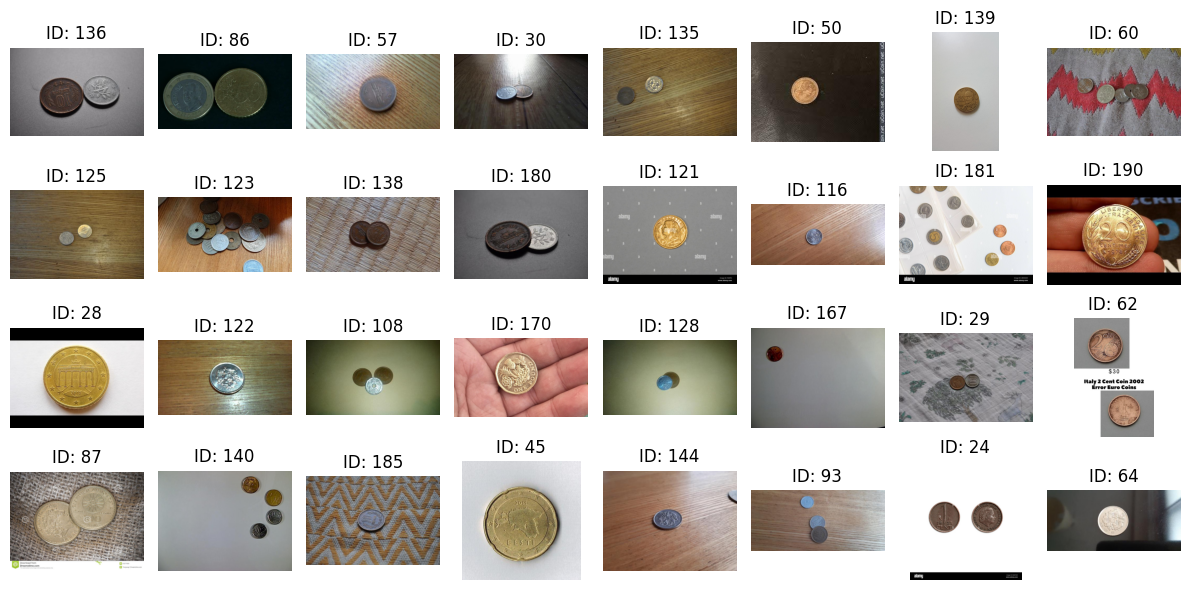

In [61]:
#let's visualize some images randomly in a grid to see what they look like
import random
random.seed(42)  # for reproducibility
    
grid_size = [4, 8]
sample_images = np.random.choice(data['images'], size=grid_size[0]*grid_size[1], replace=False)
fig, axes = plt.subplots(grid_size[0], grid_size[1], figsize=(12, 6))
for ax, img_info in zip(axes.flatten(), sample_images):
    img_path = images_dir / img_info['file_name']
    img = cv2.imread(str(img_path))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax.imshow(img)
    ax.set_title(f"ID: {img_info['id']}")
    ax.axis('off')
plt.tight_layout()
plt.show()

# Visual Dataset Characteristics: Summary Table



| Aspect                  | Observation                                                                                       |
|------------------------|--------------------------------------------------------------------------------------------------|
| **Background & Lighting** | Varied backgrounds: Plain, textured, cluttered<br>Diverse lighting: Natural, artificial, shadows, glare<br>Challenging scenarios: Non-ideal lighting |
| **Coin Characteristics**  | Multiple coin types: Different denominations/currencies<br>Varied sizes: Small to large<br>Orientation & Slant: Various angles/tilts (7.87% with significant aspect ratio deviation)<br>Reflective surfaces: Metallic highlights/shadows |
| **Scene Composition**     | Single to multiple instances: 1-14 coins per image<br>Overlapping coins: Partial occlusion<br>Spatial distribution: Scattered across frame<br>Image resolutions: 194×194 to 2048×2048 px |
| **Quality & Challenges**  | Motion blur possible<br>Partial occlusion: Boundaries/overlap<br>Complex backgrounds: Textured/mixed objects<br>Scale variation: Small coins harder to detect |


# 3. Takeaways so far

These are my takeaways so far:

> - we can not train a supervised instance segmentation model (like Mask r cnn or yolo act) directly using standard supervision as the model will not have ground truth to learn from, it only has boxes.

> - Problem statement given in the challenge pdf mentions returning bbox via endpoint but also mentions to display mask, separating circular objects, finding radius etc.

> - Since we can not learn masks from the data, I think a reasonable strategy would be to infer them from geometry.

> - As a result I see the ML problem as a problem of accurately detecting the bboxes of coins in the images and then to satisfy the mask and radius etc mentioned in the challenge, I want to rely on geometric calculations.

> - One positive aspect I see in the approach right away that we would be natively able to handle the overlapping problem by framing it as object detection. Detector would predict two bboxes in case of two overlapping coins and then via geometric post processing we can generate two masks.


> - Also, given all this since we will be doing geometric post processing to arrive at the mask, we can not be evaluating IoU for the segmentation. Based on available data, since the first part is object detection, we should go with mAP (Mean avg precision) using standard COCO metrics - mAP@0.5:0.95

> - Further from the point of the nature of endpoints design and postprocessed outcomes, we can use counting accuracy, the accuracy of number of coins detected per image as another important metric. In a case where pixel level GT is not there, it really does not matter if we are here and there by few pixels as long as we are able to capture every coin present in the image.

# 4. Final action plan

```mermaid
flowchart LR
    A["Task - Multi Instance Object Detection"] --> B["BBox Prediction"]
    B --> C["Mask - Analytically derive by fitting an ellipse (Since coins are slanted in ~8% of cases, fit ellipse inside bbox)"]
```

# 5. Appendix

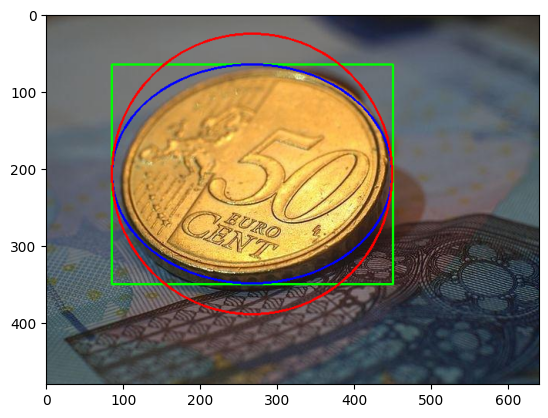

In [76]:
# quickly test the elliptical fit idea on one of the images with slant by comparing with circular fit

def visualize_ellipse_fit_vs_circular(image_path, bbox):
    img = cv2.imread(str(image_path))
    x, y, w, h = map(int, bbox)

    # draw bounding box
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # ellipse fit
    center = (int(x + w // 2), int(y + h // 2))
    axes = (int(w // 2), int(h // 2))
    cv2.ellipse(img, center, axes, 0, 0, 360, (255, 0, 0), 2)

    # circular fit
    radius = int(max(w, h) // 2)
    cv2.circle(img, center, radius, (0, 0, 255), 2)

    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)



# samples with slant
high_slant_coins = [ann for ann in data['annotations'] if ann['bbox'][2] / ann['bbox'][3] < 0.8 or ann['bbox'][2] / ann['bbox'][3] > 1.2]

# test on a sample annotation with slant
for ann in data['annotations']:
    aspect_ratio = ann['bbox'][2] / ann['bbox'][3]
    if aspect_ratio < 0.8 or aspect_ratio > 1.2:
        img_info = next(img for img in data['images'] if img['id'] == ann['image_id'])
        plt.imshow(visualize_ellipse_fit_vs_circular(images_dir / img_info['file_name'], ann['bbox']))
        break


In [71]:
# do it for all the high slant coins by putting them in grid and visualizing
high_slant_coins = [ann for ann in data['annotations'] if ann['bbox'][2] / ann['bbox'][3] < 0.8 or ann['bbox'][2] / ann['bbox'][3] > 1.2]
#check how many we have
print(f"Number of high slant coins: {len(high_slant_coins)}")

Number of high slant coins: 41


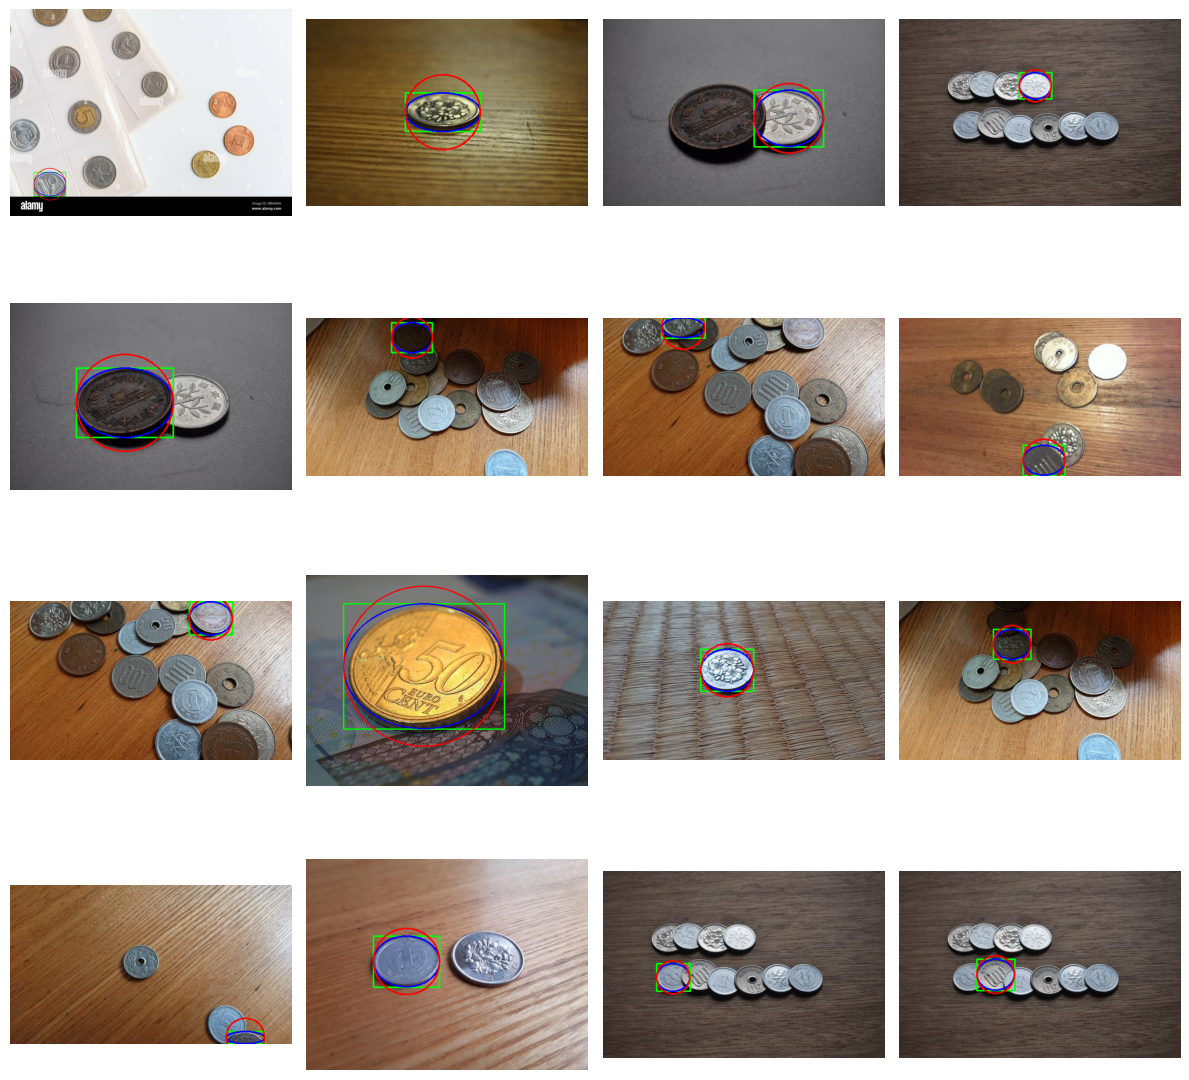

In [77]:
# lets do for 16 of them in a grid
fig, axes = plt.subplots(4, 4, figsize=(12, 12))

for ax, ann in zip(axes.flatten(), sample_high_slant_coins):
    img_info = next(img for img in data['images'] if img['id'] == ann['image_id'])
    
    img = visualize_ellipse_fit_vs_circular(
        images_dir / img_info['file_name'],
        ann['bbox']
    )
    
    ax.imshow(img)
    ax.axis("off")

plt.tight_layout()
plt.show()


*Awesome! this one is better than the circular fit for sure. We can see that the blue ellipse fits the coin much better than the red circle, which is too big and includes a lot of background. This confirms that using an elliptical fit is more appropriate for these coins, especially those with slant, as it captures their shape more accurately.*